<a href="https://colab.research.google.com/github/felipeoprj/MVP_SPRINT1/blob/main/MVP1_ML_FelipePereira_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Machine Learning para Classificação - Felipe de Oliveira Pereira**

##**Definição do problema:**
Neste notebook iremos testar alguns modelos de machine learning para classificar tipos de tumores. A ideia e adotar o modelo com o melhor desempenho ao longo dos testes realizados.

Esta base de dados contém informações sobre diagnósticos de tipos de tumores divididos entre malignos e benignos de 569 pacientes, onde cada registro representa exames de um paciente diferente. De acordo com determinadas características (Features) vindas destes exames, vamos prever se são características de um tumor maligno (Target = 0)  ou não (Target = 1). Iremos treinar o modelo para diagnosticar com maior acurácia possível baseado em dados históricos (Aprendizado Supervisionado). Faremos todas as manipulações necessárias para chegar no modelo ideal.

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995


## **Preparação dos dados**

Nesta etapa faremos a divisão do dataset em treino e teste e o prepararemos para a utilização da validação cruzada com estratificação. Além disso, nesta etapa também testaremos a técnica de feature selection utilizando o algoritmo SelectKBest.



###Imports Necessários

In [19]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada

###Carga do dataset


In [20]:
# Importando dataset
from sklearn.datasets import load_breast_cancer

# Carregando dataset
dataset = load_breast_cancer()

# Tranformando a base de dados em um DataFrame

cancer=pd.DataFrame(data=dataset.data, columns=dataset.feature_names) # convertendo para dataframe

cancer['Class']=dataset.target # Adicionando a nossa Target

# Mostra as primeiras linhas do dataset
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


###Separação do dataset em conjunto de treino e testes com holdout

Foi utilizado uma proporção de 20% da base para teste e 80% para treino conforme sugerido durante o conteúdo do curso.


In [21]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = cancer.values
X = array[:,0:30]
y = array[:,30]
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

### Feature selection:

 Foi escolhido o modelo de Seleção Univariada (SelectKBest) pois, conforme informado em aula, é o que melhor se comporta quando os atributos são numéricos e uma saída categórica, também foram testados os modelos ExtraTreesClassifier e LogisticRegression mas tiveram desempenho inferior ao modelo escolhido. O desempenho com 10 atributos foi o que treinou melhor os modelos e ao mesmo tempo deixou a execução do código mais leve. Utilizaremos esta configuração.

In [22]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", cancer.columns[0:30])

# Exibe as pontuações de cada atributos e os 6 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=cancer.columns[0:30]))

# Separando em base de treino e testes com atributos selecionados

X_train, X_test, y_train, y_test = train_test_split(features, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação


Número original de atributos: 30

Número reduzido de atributos: 10

Atributos Originais: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Scores dos Atributos Originais: [6.470e+02 1.181e+02 6.972e+02 5.731e+02 8.365e+01 3.132e+02 5.338e+02
 8.617e+02 6.953e+01 9.346e-02 2.688e+02 3.909e-02 2.539e+02 2.437e+02
 2.558e+00 5.325e+01 3.901e+01 1.133e+02 2.412e-02 3.468e+00 8.608e+02
 1.


## **Modelagem e Treinamento**

Nesta etapa criaremos e avaliaremos modelos com parametrização padrão e posteriormente utilizando pipeline de normalização e padronização para futura reavaliação do melhor modelo. Além disso, faremos a otimização de hiperparâmetros a fim de melhorar os modelos para aplicação final.

Não foram observados problemas de underfitting. Os modelos performaram bem, portanto não foi necessário algum método avançado ou mais complexo.

### Criação e avaliação de modelos: linha base

Nesta fase definimos os modelos base e aplicamos cross validation com parametrização padrão e usando a acrurácia como scoring, conforme ensinado em aula, para testagem do modelo.

LR: 0.940676 (0.024094)
KNN: 0.916425 (0.036884)
CART: 0.927536 (0.032442)
NB: 0.940725 (0.038325)
SVM: 0.905266 (0.038680)
Bagging: 0.938502 (0.032241)
RF: 0.951643 (0.030883)
ET: 0.951643 (0.027422)
Ada: 0.933865 (0.037077)
GB: 0.942899 (0.028105)
Voting: 0.945024 (0.014919)


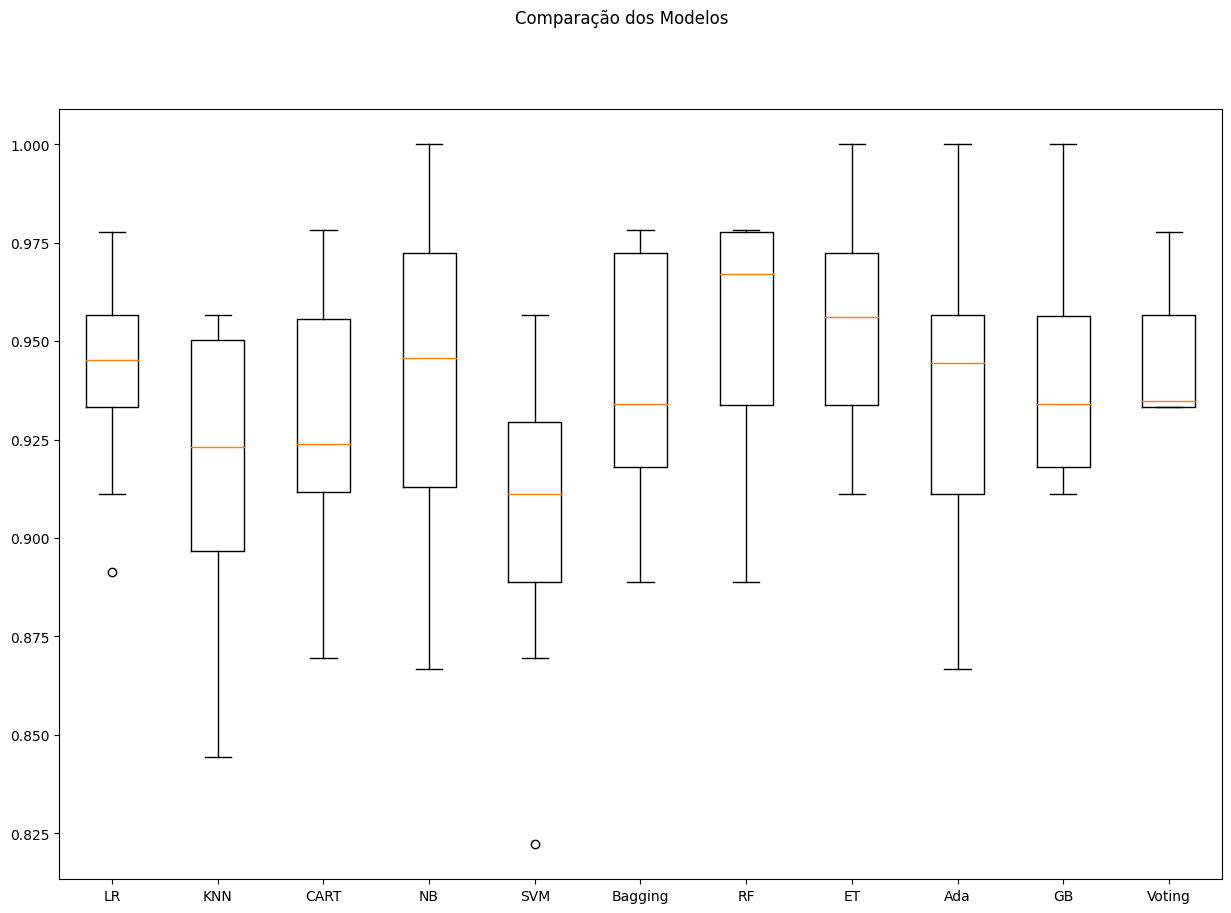

In [23]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

O melhor modelo com base no cross validation abaixo foi a Logistic Regression com padronização, provavelmente seguiremos com este modelo para aplicação da solução do nosso problema.

LR-orig: 0.941 (0.024)
KNN-orig: 0.916 (0.037)
CART-orig: 0.928 (0.032)
NB-orig: 0.941 (0.038)
SVM-orig: 0.905 (0.039)
Bag-orig: 0.939 (0.032)
RF-orig: 0.952 (0.031)
ET-orig: 0.952 (0.027)
Ada-orig: 0.934 (0.037)
GB-orig: 0.943 (0.028)
Vot-orig: 0.945 (0.015)
LR-padr: 0.960 (0.028)
KNN-padr: 0.943 (0.031)
CART-padr: 0.921 (0.029)
NB-padr: 0.952 (0.034)
SVM-padr: 0.954 (0.033)
Bag-padr: 0.943 (0.036)
RF-padr: 0.952 (0.024)
ET-padr: 0.958 (0.028)
Ada-padr: 0.934 (0.037)
GB-padr: 0.941 (0.029)
Vot-padr: 0.954 (0.032)
LR-norm: 0.943 (0.037)
KNN-norm: 0.945 (0.028)
CART-norm: 0.919 (0.033)
NB-norm: 0.952 (0.034)
SVM-norm: 0.949 (0.033)
Bag-norm: 0.949 (0.034)
RF-norm: 0.949 (0.037)
ET-norm: 0.956 (0.028)
Ada-norm: 0.934 (0.037)
GB-norm: 0.945 (0.030)
Vot-norm: 0.947 (0.031)


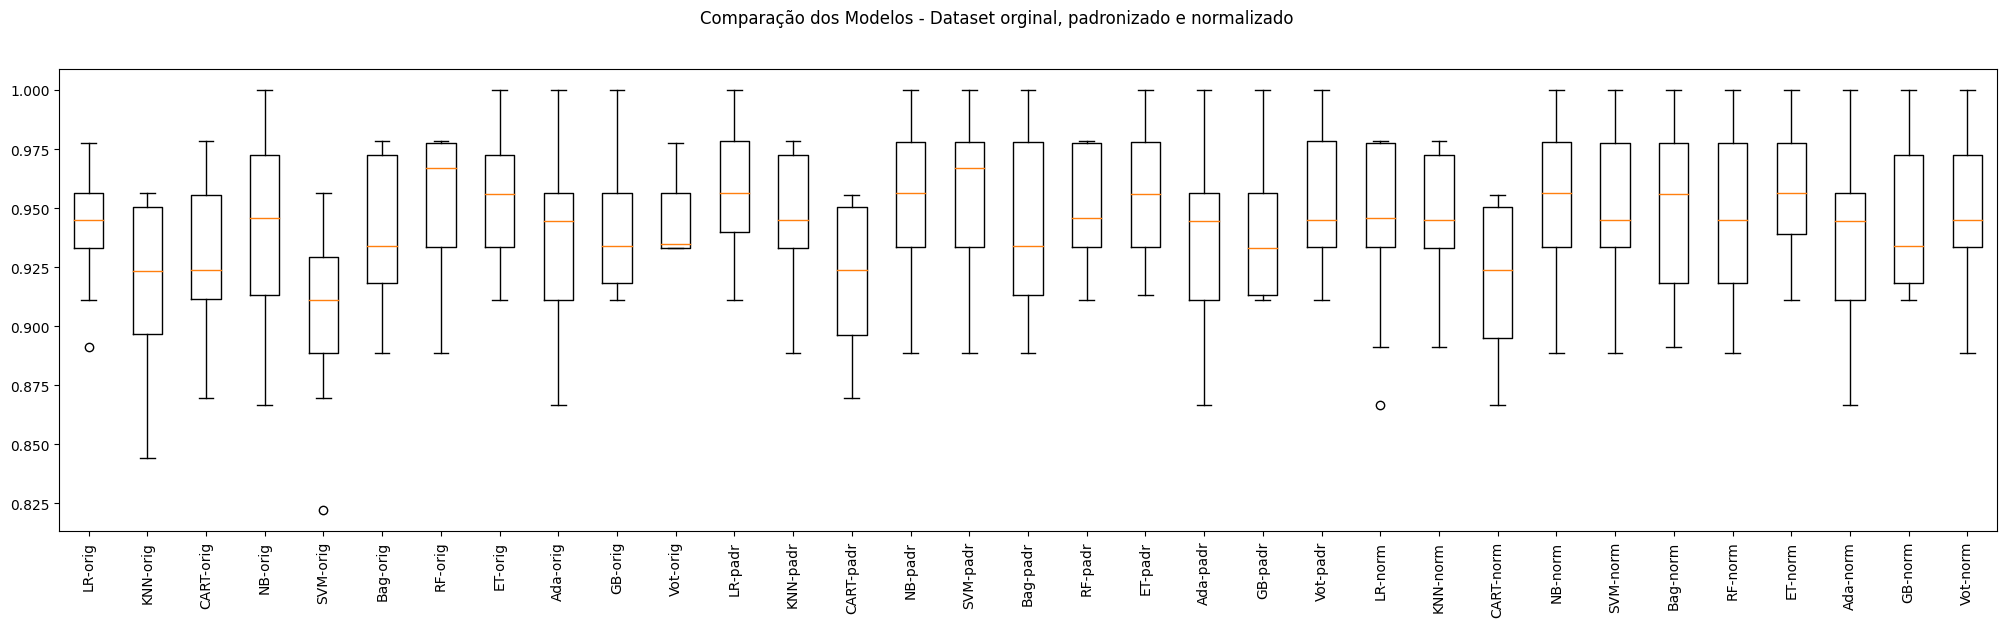

In [24]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros:

Como não temos scripts de otimização dos hiperparâmetros de LR para classificação, faremos com KNN para fins de comparação com o modelo escolhido anteriormente, pois tiveram também bons resultados nos testes anteriores. A partir dai, entenderemos se de fato seguiremos com o LR-Padr para aplicação.


In [25]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.929420 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-padr - Melhor: 0.958309 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-norm - Melhor: 0.953816 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}


## **Avaliação de Resultados**

Abaixo testaremos, com todo nosso dataset, a acurácia dos algoritmos LR-Padr ,que foi o que obteve o melhor resultado na validação cruzada, e os modelos de KNN (Original, com normalização e padronização) com hiperparâmetros otimizados que, apesar de um pouco pior, tiveram bom resultado no cross validation feito acima para decidir se manteremos o LR-Padr como modelo a ser aplicado ou trocaremos por algum desses modelos KNN.



####Finalização utilizando o modelo KNN-padr com parâmetros otimizados

In [26]:
# Avaliação do modelo KNN-Padr com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors=9)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9210526315789473


In [27]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

#### Finalização utilizando o modelo KNN-Orig com parâmetros otimizados

In [28]:
# Avaliação do modelo KNN-Orig com o conjunto de testes

# Preparação do modelo
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors=7)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

# Preparação do modelo com TODO o dataset
model.fit(X, y)

0.9649122807017544


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

####Finalização Utilizando o modelo KNN-Norm com parâmetros otimizados

In [29]:
# Avaliação do modelo KNN-Norm com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = KNeighborsClassifier(metric = 'manhattan', n_neighbors=9)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9210526315789473


In [30]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

####Finalização utilizando o modelo LR-Padr

In [31]:
# Avaliação do modelo LR-Padr com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = Pipeline([standard_scaler, reg_log])
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9298245614035088


In [32]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LR', LogisticRegression(max_iter=200))])

#### Conclusão

Apesar do resultado de acurácia de todos os modelos testados acima terem sido relativamente altos e bem próximos, a decisão final seria por prosseguir com o modelo de Linear Regression com Padronização, pois obteve os melhores resultados tanto na validação cruzada quanto de acurácia com o conjunto de testes, mesmo que a vantagem em relação aos outros tenha sido pequena. Os modelos 'KNN-padr' e 'KNN-Norm' tiveram um desempenho melhor no conjunto de treino do que no conjunto de testes, mas essa diferença na acurácia foi pequena e não houve nenhum tipo de vazamentos de daods, portanto considero um cenário normal, sem overfitting.